# Poliynomial Regression-Overfiting-Underfiting

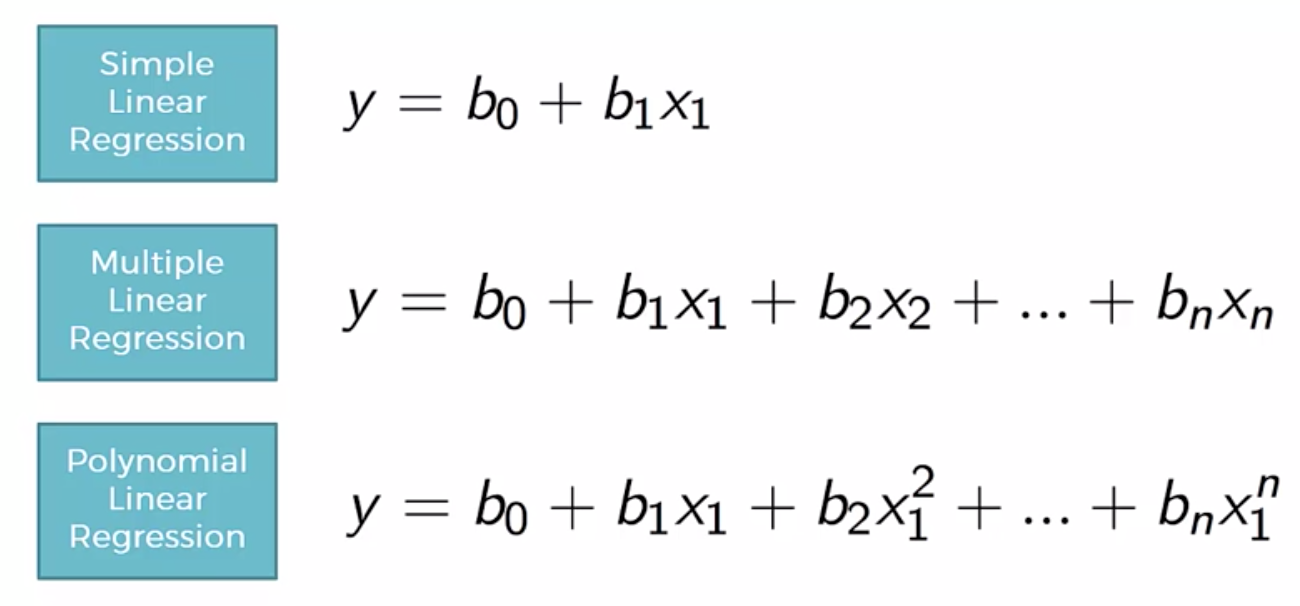

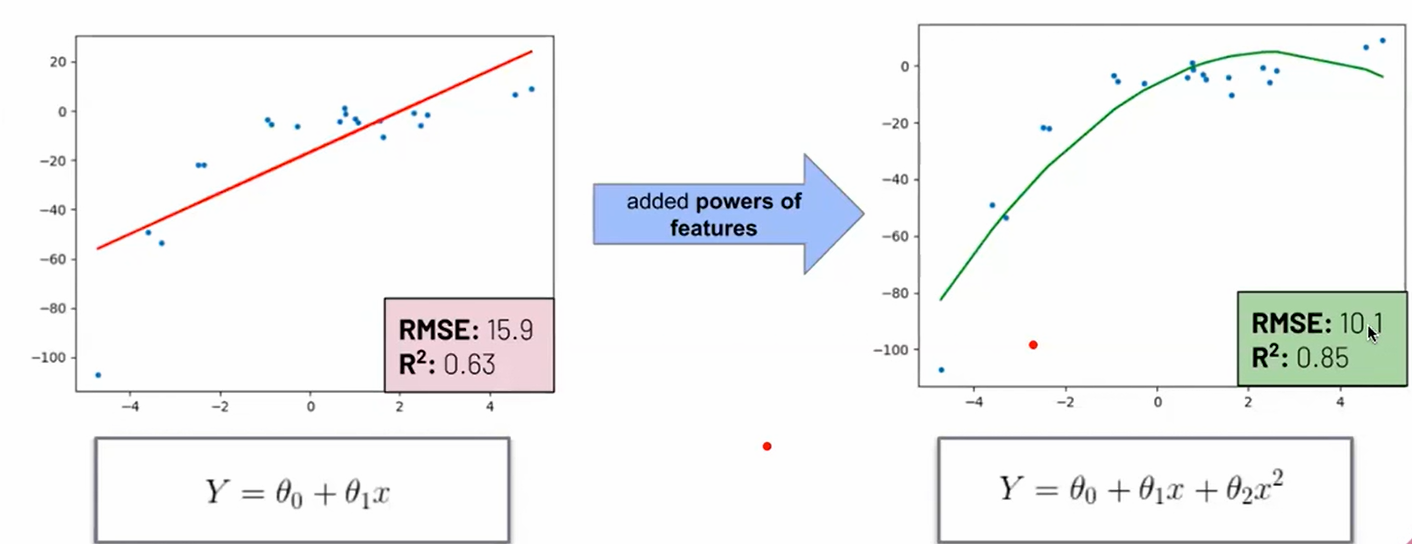

In [ ]:
#görseldeki dağılıma linear regression uygularsak başarılı şekilde fit edemiyor.bias yüksek,varyans düşük underfitting,
#yani yukarıdaki datayı linear regressionla güzel bir şekilde genelleyemeyiz(rmse yüksek r2 düşük )
#regression derecesini arttırdığımızda eğri daha iyi genelleme yapmış oldu(rmse düştü r2 çıktı)

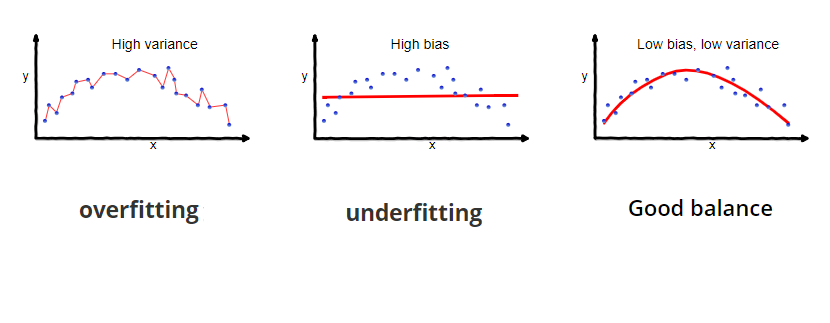

In [ ]:


#UNDERFIT:
#    *az parametre 
#    *modelin data eğitimine ihtiyacı var
#    *Datayı çok fazla geneller
#    *Hem eğitim hemde test datasında büyük hatalar yapar 
#    *Bu yüzden varyansı düşük çıkar
#    *Model hiçbir şey öğrenmemiş olur

#OVERFIT:
#    *çok parametre olunca bütün noktalarına girer
#    *datayı ezberler
#    *train datada varyans --->düşük 
#    *test datasında varyans ---<yüksek    çünkü ezberledi

#Underfitting ve Overfitting ile mücadele için;
#underfittig-->feature eklenir(Comlexity artar)
#Overfitting-->Feature azaltılır(Comlexity düşer)
#datanın azlığından kaynaklanıyorsa data arttırılır yada derece düşürülür



# Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship 
between the independent variables and dependent variables are modeled in the nth degree polynomial.

Polinom Regresyon , bağımsız değişkenler ile bağımlı değişkenler arasındaki ilişkinin n'inci derece 
polinomda modellendiği bir regresyon analizi şeklidir.

Types of polinomials

1st degree ---> linear    b1x + b0

2nd degree ---> Quadratic b2x**2 + b1x + b0

3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0 (third order equation)

## Import libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [13]:
from sklearn.preprocessing import PolynomialFeatures #polynominal feature ları kullanmamız için

In [14]:
data = np.array([[2, 3, 4]])   # Çalışma mantığını anlatmak için array ürettik
print(data)

[[2 3 4]]


In [15]:
trans = PolynomialFeatures(degree = 2, include_bias =False) # Datayı polinomial Featurelara dönüştürüyoruz
# include_bias = False :basitçe formülde b0 ın olmaması

In [16]:
trans.fit(data) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2  # Veriyi öğrenme/tanıma aşaması

PolynomialFeatures(include_bias=False)

In [ ]:
# NOT:fit kalıbını çıkar, transform o kalıbı uygula demek

In [17]:
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

In [18]:
trans.transform(data)  # Veriyi fit ettikten sonra dönüştürüyor. Ancak alttaki komut tek aşamada yapıyor

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [19]:
trans.fit_transform(data) # combining method # Daha kullanışlı
# Eldeki feature lar ile sentetik feature lar ürettik diyebiliriz

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Dataset

In [20]:
df = pd.read_csv("Advertising.csv") # Şimdi gerçek dataya uygulayalım üsttekileri

In [21]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [22]:
X = df.drop("sales", axis =1)  # sales haricindeki diğer değişkenleri seçiyoruz(Independent variables)
y = df.sales

In [23]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [24]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [25]:
poly_features = polynomial_converter.transform(X)

In [26]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [27]:
poly_features.shape # Shape de columns 3 dü, 9 a çıktı(2.dereceden olduğu için)

(200, 9)

In [28]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [29]:
X.shape

(200, 3)

## Train | Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)
# test_size    : train datasının ve test datasının oranını belirleme. Test oranı:%30, Train oranı:%70
# random_state : Her seferinde aynı sonuçları almak için kullanılır

In [32]:
X_train.shape

(140, 9)

## Model for fitting

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model_poly = LinearRegression()

In [35]:
model_poly.fit(X_train, y_train)  # Eğitim aşaması
# X_train ve y_train kullanarak modeli eğitiyoruz


LinearRegression()

In [36]:
y_pred = model_poly.predict(X_test)

In [37]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


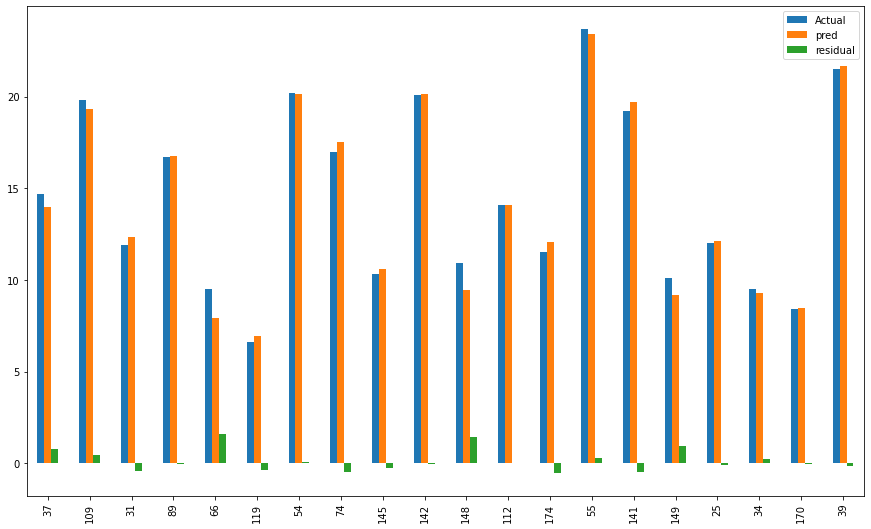

In [38]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

## Poly Coefficients

In [39]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [40]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [41]:
df_coef 
# Standartlaştırma yapmadığımız için alttaki feature ların önemlerini sıralamak çok doğru değil.
# Bunu Ridge ve Lasso da göreceğiz

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


## Evaluation on the Test Set

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
y_pred = model_poly.predict(X_test) # Tahminlerimizi yaptık.(Dikkat: X_test ile)
# Şimdi metriklerimize bakarak tahminlerin ne kadar iyi olduğuna bakalım

In [45]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [46]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: 0.9843529333146795
MAE 		: 0.48967980448035575
MSE 		: 0.44175055104033906
RMSE 		: 0.6646431757269001


In [47]:
y_train_pred = model_poly.predict(X_train) # Tahminlerimizi yaptık.(Dikkat: X_train ile)

In [48]:
eval_metric(y_train, y_train_pred) 
# X_test ile X_train metric leri arasında çok fark olmadığı için
#underfitting, overfitting durumu yok diyebiliriz

Model performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.4049248139151436
MSE 		: 0.3456939142443997
RMSE 		: 0.5879574085292231


* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609

* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

In [ ]:
# Şu anda 2. dereceden bir polynomun(lineer regression a göre) daha iyi sonuçlar ürettiğini söyleyebiliriz
# Acaba derece artarsa daha mı iyi olur sonuçlar. Buna bakacağız altta
# NOT: Polynomial regression un dezavantajının bu olduğu söylenmişti

## Let's find optimal degree of poly

In [49]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    degrees=[]
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        degrees.append(i)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "Degree":degrees}, 
                        index=range(1,d))
        

In [50]:
poly(10) # Test hatası belli bir seviye sonra veriyi ezberlemiş olduğunu görüyoruz
# .. Çünkü veriyi o kadar ezberlemiş ki train hatasında hata neredeyse hiç yok ama
# .. hiç görmediği veri ile(test verisi) karşılaştırınca ezberlediği için tahminler doğru gelmemiş

,train_rmse_errors,test_rmse_errors,Degree
1,1.734594,1.516152,1
2,0.587957,0.664643,2
3,0.433934,0.580329,3
4,0.351708,0.507774,4
5,0.250934,2.575809,5
6,0.199326,4.265809,6
7,5.418481,1383.405295,7
8,0.150849,3733.422567,8
9,0.171754,95489.264523,9


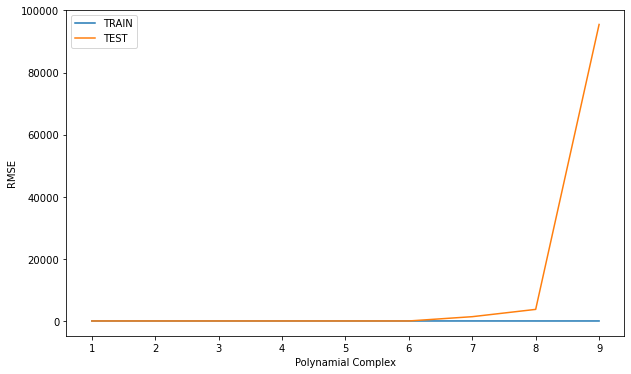

In [51]:
# Derece 1 den 9 a kadar
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

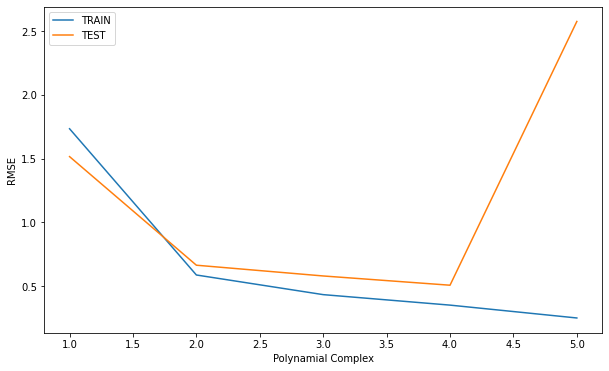

In [52]:
# Derece 1 den 5 e kadar olan kısmı inceleyelim
# Derece 4-5 arası ezberleme yapmış
# derece 1 de de underfitting var
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

# Hangi noktayı seçeceğiz optimal değeri seçmek için
# Sınır değerlerden(2.0 ve 4.0) uzak durulmalı(underfitting ve overfitting e gitmeye meyilli)
# .. O yüzden orta yolu seçmek daha anlamlı(yani 3.0)

## Finalizing Model Choice

In [53]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [54]:
final_model = LinearRegression()

In [55]:
final_model.fit(final_poly_converter.fit_transform(X), y) 
# Burada datayı bölmedik artık çünkü optimal noktayı belirlediğimiz için tüm datayla eğitimi yapalım ki 
# .. en ideal tahminleri elde edelim

LinearRegression()

## Predictions

In [56]:
new_record = [[150, 20, 15]]

In [57]:
new_record_poly = final_poly_converter.fit_transform(new_record) 
# Burada new_record_poly formatını değiştiriyorum

In [58]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [59]:
final_model.predict(new_record_poly) # Sonuç: 14.24
# Kulanıcı derse ki eğer benim tv değerim 150, radio :20, newspaper:20 olursa sonucum(sales) ne olur?? --> 14.24

array([14.24950844])

## <span style='color:red'> Overfitting</span> 

In [60]:
# Dereceyi 5 seçerek overfitting durumunu gözlemleyelim
over_poly_converter = PolynomialFeatures(degree =5, include_bias =False)

# over_model = LinearRegression()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [63]:
over_model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred_over = over_model.predict(X_test)
eval_metric(y_test, y_pred_over)

Model performance:
--------------------------
R2_score 	: 0.7649916528404768
MAE 		: 0.6659637641421313
MSE 		: 6.634794172264552
RMSE 		: 2.575809420796607


In [65]:
y_train_over = over_model.predict(X_train)
eval_metric(y_train, y_train_over)
# Gördüğümüz gibi metricler arasındaki değerlerde kayda değer(örneğin R_2 0.99-0.76) fark var
# RMSE ye bakarsak train datasında hata çok çok düşük(0.25) ama hiç görmediği test te 2.575 e çıkmış

Model performance:
--------------------------
R2_score 	: 0.9976072484167179
MAE 		: 0.1862092141111129
MSE 		: 0.06296802178630591
RMSE 		: 0.2509342977480478


## <span style='color:red'> Underfitting</span> 

In [ ]:
# Gördüğümüz gibi metricler arasındaki değerlerde fark var
# r2 de performance düşmüş(0.90 dan, 0.86 ya). Çok düşmemiş ama bu data için ideal
# .. olan değerler daha yüksek olmalıydı
# RMSE de de fark var
